In [3]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

x=[[3],[1],[5],[2],[4]]
y=[[2.8],[0.9],[5],[2.1],[4.3]]
print(x)
print(y)

[[3], [1], [5], [2], [4]]
[[2.8], [0.9], [5], [2.1], [4.3]]


In [13]:
import numpy as np
import tensorflow as tf

#data process
x=np.asarray(x,dtype=np.float32)
print(x)
y=np.asarray(y,dtype=np.float32)
print(y)

[[3.]
 [1.]
 [5.]
 [2.]
 [4.]]
[[2.8]
 [0.9]
 [5. ]
 [2.1]
 [4.3]]


In [14]:
#data input
x_input=tf.placeholder(tf.float32,(None,1))
y_input=tf.placeholder(tf.float32,(None,1))

#model
w=tf.Variable(np.random.rand(1,1),dtype=tf.float32)
b=tf.Variable(np.random.rand(1,),dtype=tf.float32)

pred=tf.add(tf.matmul(x_input,w),b)

#define loss
loss=tf.reduce_mean(tf.pow(pred-y_input,2))

#define optimization
optim=tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [15]:
#define session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.local_variables_initializer())

    #start train model
    for epoch in range(training_epochs):
        pred_y,l,_=sess.run([pred,loss,optim],feed_dict={x_input:x,y_input:y})
        # Display logs per epoch step
        if (epoch + 1) % display_step == 0:
            print("Epoch {:4d} cost: {:.9f}".format((epoch + 1),l))
    print("Optimization Finished!")
    final_w=np.squeeze(sess.run(w))
    final_b=np.squeeze(sess.run(b))
    print("Training modal w: {:.5f}, b: {:.5f}".format(final_w,final_b))

Epoch   50 cost: 0.086702369
Epoch  100 cost: 0.069378629
Epoch  150 cost: 0.057031643
Epoch  200 cost: 0.048231758
Epoch  250 cost: 0.041959882
Epoch  300 cost: 0.037489824
Epoch  350 cost: 0.034303933
Epoch  400 cost: 0.032033313
Epoch  450 cost: 0.030414943
Epoch  500 cost: 0.029261559
Epoch  550 cost: 0.028439466
Epoch  600 cost: 0.027853575
Epoch  650 cost: 0.027435999
Epoch  700 cost: 0.027138349
Epoch  750 cost: 0.026926253
Epoch  800 cost: 0.026775062
Epoch  850 cost: 0.026667342
Epoch  900 cost: 0.026590526
Epoch  950 cost: 0.026535815
Epoch 1000 cost: 0.026496777
Optimization Finished!
Training modal w: 1.03363, b: -0.07702


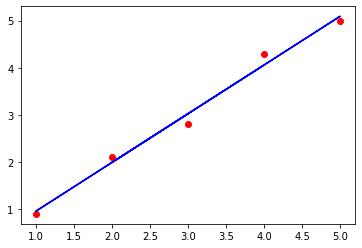

In [17]:
#show your result
pred_y=final_w*x+final_b
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x,y,'ro',x,pred_y,'b')
plt.show()